<a href="https://colab.research.google.com/github/shaikhmyousuf/Cranfield_IRP/blob/main/RGB_AE_CFZ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/orion99/autoencoder-made-easy/notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image
from google.colab.patches import cv2_imshow


In [ ]:
def im2array2(imagefilepath):
  impix = cv2.resize(cv2.imread(imagefilepath), (256,256))
  #impix = cv2.resize(cv2.imread(imagefilepath), (512,512))
  #impix = cv2.imread(imagefilepath) #without reshape
  impix = impix.astype('float32') #For ensuring everything is a float
  impix /= 255.0 #For scaling
  return impix

# Import Training Data

In [ ]:
#directory_in_str = '/content/drive/MyDrive/images/nir_data'
directory_in_str = '/content/drive/MyDrive/irp/training_data/Train_Run_1/_out_cam_tail'
directory = os.fsencode(directory_in_str)
filepaths = []   
nir_filepath = [] 
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     filepaths.append(filename)

In [ ]:
filepaths = []   
nir_filepath = [] 
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     filepaths.append(filename)

rgb_filepath = [] #
for i in filepaths:
  path_rgb = directory_in_str+'/'+i
  rgb_filepath.append(path_rgb)

len(rgb_filepath)
#rgb_filepath[5925]

5925

In [ ]:
rgb_filepath[5883]

'/content/drive/MyDrive/irp/training_data/Train_Run_1/_out_cam_tail/007211.png'

In [ ]:
list_of_rgb_arrays = []

for i in range(5883):
     image_array = im2array2(rgb_filepath[i])
     list_of_rgb_arrays.append(image_array)

# for i in range(5978):
#     image_array = im2array2(rgb_filepath[i])
#     list_of_rgb_arrays.append(image_array)



In [ ]:
X_train = np.array(list_of_rgb_arrays)

#Autoencoder -Build & Compile


In [ ]:
input_layer = Input(shape=(256,256, 3), name="INPUT")
#input_layer = Input(shape=(512, 512, 3), name="INPUT")
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(code_layer)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

AE = Model(input_layer, output_layer)
AE.compile(optimizer=opt, loss='mse')
AE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#Autoencoder Fit


In [ ]:
# with tf.device('/gpu:0'):
#   cat_AE.fit(X_train, X_train, epochs=1, batch_size=2) #, #shuffle=True)#,
#                 #validation_data=(cat_test, cat_test))
#cat_AE.fit(X_train, X_train, epochs=1, batch_size=2)

history = AE.fit(X_train[0:3000], X_train[0:3000], batch_size=128, epochs=20, validation_split=0.1)


Epoch 1/20
22/22 [==============================] - 22s 342ms/step - loss: 0.1513 - val_loss: 0.0352
Epoch 2/20
22/22 [==============================] - 6s 289ms/step - loss: 0.0150 - val_loss: 0.0091
Epoch 3/20
22/22 [==============================] - 6s 292ms/step - loss: 0.0078 - val_loss: 0.0065
Epoch 4/20
22/22 [==============================] - 6s 292ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 5/20
22/22 [==============================] - 6s 292ms/step - loss: 0.0046 - val_loss: 0.0037
Epoch 6/20
22/22 [==============================] - 6s 294ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 7/20
22/22 [==============================] - 7s 297ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 8/20
22/22 [==============================] - 7s 296ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 9/20
22/22 [==============================] - 7s 301ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 10/20
22/22 [==============================] - 7s 305ms/step - loss: 0.0024 - val_loss: 0.002

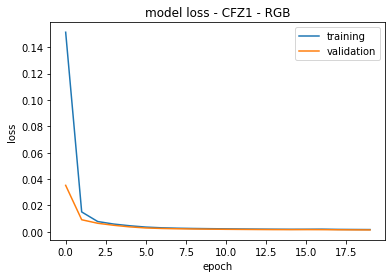

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss - CFZ1 - RGB')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
#True = False

# Import Testing Data

In [ ]:
#directory_in_str = '/content/drive/MyDrive/images/nir_data'
directory_in_str = '/content/drive/MyDrive/irp/Test_Scenarios/Test_S1.1_NH/_out_cam_tail'
directory = os.fsencode(directory_in_str)
filepaths = []   
nir_filepath = [] 
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     filepaths.append(filename)

In [ ]:
filepaths_obs = []    
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     filepaths_obs.append(filename)

rgb_filepath_obs = [] #
for i in filepaths_obs:
  path_rgb = directory_in_str+'/'+i
  rgb_filepath_obs.append(path_rgb)

len(rgb_filepath_obs)
#rgb_filepath_obs[0]

3

In [ ]:
list_of_rgb_obs_arrays = []

for i in range(2):
     image_array = im2array2(rgb_filepath_obs[i])
     list_of_rgb_obs_arrays.append(image_array)

In [ ]:
X_test = np.array(list_of_rgb_obs_arrays)
len(X_test)

2

#Similarity Metrics

In [ ]:
#similarity metrics
def mse(a, b):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((a.astype("float") - b.astype("float")) ** 2)
	err /= float(a.shape[0] * b.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err


#import modules
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cosine_sim(a,b):
  x = np.reshape(a, -1)
  y = np.reshape(b, -1)
  cs = dot(x,y)/(norm(x)*norm(y))
  return cs

#Make Predictions | proof of concept

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics.pairwise import cosine_similarity 
import statistics


In [ ]:
val_set = X_train[5150:5650]

In [ ]:
pred_val = AE.predict(val_set)
pred_test = AE.predict(X_test)

In [ ]:
mse_list_val = []
for i in range(499):
  m = mse(val_set[i],pred_val[i])
  mse_list_val.append(m)

In [ ]:
cs_list_val=[]
for i in range(499):
  c = cosine_sim(val_set[i],pred_val[i])
  cs_list_val.append(c)

In [ ]:
print('max val mse' , max(mse_list_val))
print('avg val mse' , statistics.mean(mse_list_val))
print('min cs val' , min(cs_list_val))
print('\n')
print('Obstacle = Airplane' , mse(X_test[1],pred_test[1]))
print('Obstacle = Airplane' , cosine_sim(X_test[1],pred_test[1]))

max val mse 0.006013493077396178
avg val mse 0.005095440009727987
min cs val 0.99804443


Obstacle = Airplane 0.011611303877720325
Obstacle = Airplane 0.9961578


In [ ]:
mse_list_val.index(max(mse_list_val))

15

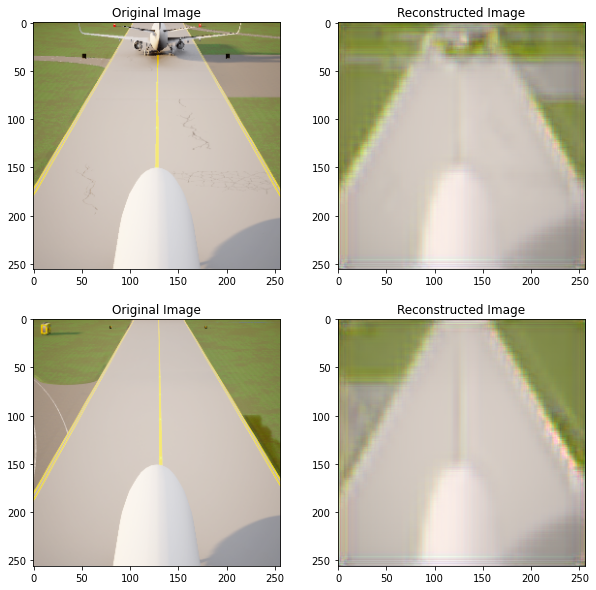

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Original Image')
ax1.imshow(X_test[0,:,:,::-1])

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Reconstructed Image')
ax2.imshow(pred_test[0,:,:,::-1])

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('Original Image')
ax3.imshow(val_set[mse_list_val.index(max(mse_list_val)),:,:,::-1])

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('Reconstructed Image')
ax4.imshow(pred_val[mse_list_val.index(max(mse_list_val)),:,:,::-1])


In [ ]:
# img1 = X_test[0]*255
# img2  = pred_test[0]*255
# horizontal_concat = np.concatenate((img1, img2), axis=1)
# cv2_imshow(horizontal_concat)
# #cv2.waitKey(0)

#Performance Evaluation
 

##import evaluation set

In [ ]:
#directory_in_str = '/content/drive/MyDrive/images/nir_data'
directory_in_str = '/content/drive/MyDrive/irp/test_mix/mix1_RGB'
directory = os.fsencode(directory_in_str)
filepaths = []   
nir_filepath = [] 
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     filepaths.append(filename)


In [ ]:
filepaths_obs = []    
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     filepaths_obs.append(filename)
filepaths_obs.sort(reverse=True)
rgb_filepath_obs = [] #
for i in filepaths_obs:
  path_rgb = directory_in_str+'/'+i
  rgb_filepath_obs.append(path_rgb)

len(rgb_filepath_obs)
#rgb_filepath_obs[0]

27

In [ ]:
rgb_filepath_obs

['/content/drive/MyDrive/irp/test_mix/mix1_RGB/09fog.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/07hold2.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/05desert.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/04fox.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/03firetruck.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/02cube.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/01airplane.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/002441.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/002440.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/002439.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/002438.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/002437.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/002436.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/002435.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/002434.png',
 '/content/drive/MyDrive/irp/test_mix/mix1_RGB/002433.png',
 '/content/drive/MyDrive/irp/t

In [ ]:
list_of_rgb_obs_arrays = []

for i in range(27):
     image_array = im2array2(rgb_filepath_obs[i])
     list_of_rgb_obs_arrays.append(image_array)

In [ ]:
Y_true = np.array(list_of_rgb_obs_arrays)
len(Y_true)

27

##predictions on evaluation set

In [ ]:
Y_pred = AE.predict(Y_true)

In [ ]:
mse_pred = []
for j in range(27):
  m = mse(Y_true[j],Y_pred[j])
  mse_pred.append(m)


In [ ]:
mse_pred

[0.005328842398807087,
 0.016762013262692076,
 0.010494582987116101,
 0.005765610502607128,
 0.009276614787829505,
 0.007849554552702045,
 0.016567334050253547,
 0.005345387064925247,
 0.005348162209670203,
 0.005372342869879088,
 0.005377991406778565,
 0.00537410331359537,
 0.005371504259764689,
 0.005378886008084696,
 0.005354739742805172,
 0.005379370381179952,
 0.005336661917076691,
 0.005319354249839369,
 0.00530687751328259,
 0.005293178855130562,
 0.005308022179114636,
 0.005325779829494892,
 0.005308739902532786,
 0.005354844945058309,
 0.005449224454281245,
 0.0046155077979903765,
 0.004646542313665604]

In [ ]:
sd=2
threshold = statistics.mean(mse_list_val) + sd*statistics.stdev(mse_list_val)
pred_action_list = []
for i in range(27):
  if mse_pred[i] > threshold:
    action = 'stop'
  else:
    action = 'go'
  pred_action_list.append(action)
pred_action_list

['go',
 'stop',
 'stop',
 'go',
 'stop',
 'stop',
 'stop',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go']

In [ ]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

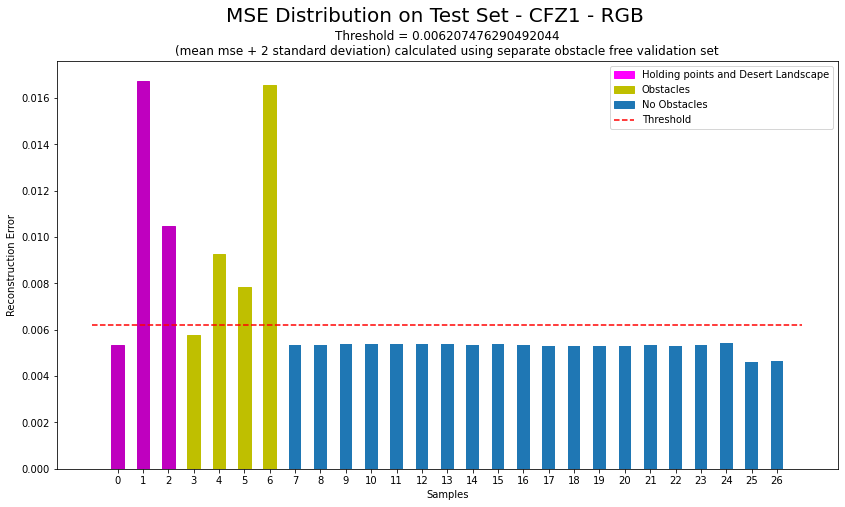

In [ ]:
x= range(27)
y= mse_pred
fig, ax = plt.subplots(figsize=(14, 7.5))
barlist = plt.bar(x,y, width=0.5)
barlist[0].set_color('m')
barlist[1].set_color('m')
barlist[2].set_color('m')
barlist[3].set_color('y')
barlist[4].set_color('y')
barlist[5].set_color('y')
barlist[6].set_color('y')
# barlist[7].set_color('y')
# barlist[8].set_color('y')
plt.hlines(threshold,-1,27,color='red', linestyle='--')

#Title and axes
plt.suptitle('MSE Distribution on Test Set - CFZ1 - RGB', fontsize = 20)
plt.title('Threshold = '+str(threshold)+'\n'+'(mean mse + '+str(sd)+' standard deviation) calculated using separate obstacle free validation set')
plt.xlabel('Samples', fontsize = 10)
plt.ylabel('Reconstruction Error',fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(range(27),fontsize = 10)

#Legend
handles, labels = plt.gca().get_legend_handles_labels()
blue_patch = mpatches.Patch(color='tab:blue',label='No Obstacles')
yellow_patch = mpatches.Patch(color='y',label='Obstacles')
mag_patch = mpatches.Patch(color='magenta',label='Holding points and Desert Landscape')
line = Line2D([0],[0], label='Threshold',color='r',linestyle='--')
handles.extend([mag_patch, yellow_patch,blue_patch,line])
plt.legend(handles=handles)

plt.show()



In [ ]:
true_action_list = []
for k in range(27):
    if (2<k<7):
      action = 'stop'
    else:
      action = "go"
    true_action_list.append(action)
true_action_list

['go',
 'go',
 'go',
 'stop',
 'stop',
 'stop',
 'stop',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go']

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix


In [ ]:
cm = confusion_matrix(true_action_list, pred_action_list)

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
fx = sns.heatmap(cm, annot=True, cmap='Blues',cbar=False, annot_kws={'fontsize':50})

# labels the title and x, y axis of plot
plt.suptitle('Confusion Matrix - CFZ1 - RGB', fontsize = 20)
plt.title('threshold = '+str(threshold)+'\n'+'(mean mse + '+str(sd)+' standard deviation)')

# fx.set_xlabel('Predicted Values', )
plt.xlabel('Predicted Values', fontsize = 20)
plt.ylabel('Actual Values ', fontsize = 20);

# labels the boxes
fx.xaxis.set_ticklabels(['Go','Stop'])
fx.yaxis.set_ticklabels(['Go','Stop'])


plt.show()

#Extra

In [ ]:
True = False

SyntaxError: ignored

In [ ]:
# img_obs1 = ae_obs1[0]#*255
# img_obs2 = ae_obs1[1]#*255
# cv2_imshow(ae_obs1[1]*255)

In [ ]:
# cs_list_val.index(max(cs_list_val))

In [ ]:
# mse_list_val.index(min(mse_list_val))

In [ ]:
mse_list_val[497]

In [ ]:
cv2_imshow(ae_out[497]*255)

In [ ]:
avg = sum(mse_list_val) / len(mse_list_val)

In [ ]:
print(avg)

In [ ]:
import statistics

In [ ]:
avg_mse = statistics.mode(mse_list_val)

In [ ]:
print(avg_mse)

In [ ]:
ae_obs1 = cat_AE.predict(X_obs)
#ae_obs2 = cat_AE.predict(X_obs)

In [ ]:
img_test = ae_out[230]#*255
img_test_NH = ae_out[497]
cv2_imshow(img_test)

In [ ]:
cv2_imshow(ae_out[0]*255)